# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [2]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

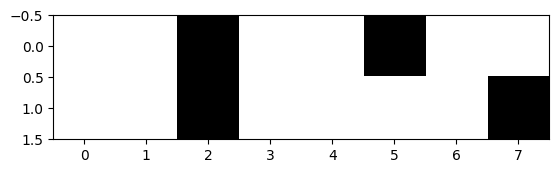

In [6]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1

$$
U(x)= \sum_{c =\{s,t\}} V_c ({x_s,x_t})
$$

Pour l'image générée on : $U(x)= 9 \beta$

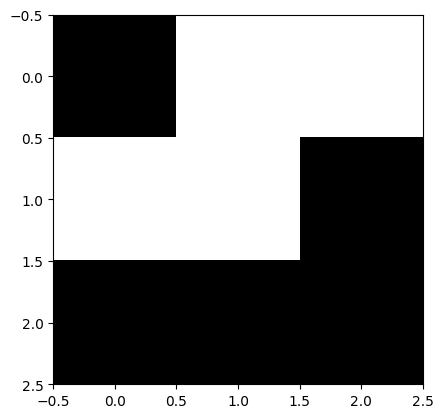

In [10]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2

$$
P_r(X_s = x_s / V _s) = \frac{1}{Z^s} exp(-U_s(x_s,V_s))
$$

$$
\begin{cases}
    U_s(0 | 0,0,1,1,0,0,0,1) = 3 V_c (0,1)+ 5 Vc(0,0) = 3 \beta\\
    U_s(1 | 0,0,1,1,0,0,0,1) = 3 V_c(0,0) + 5 Vc(0,1) = 5 \beta
    \end{cases}
$$

$$
\begin{cases}
    P_r(X_s=0 | 0,0,1,1,0,0,0,1) =\frac{ exp(- 3 \beta)}{Z_s}\\
    P_r(X_s =1 | 0,0,1,1,0,0,0,1) = \frac{ exp(- 5 \beta)}{Z_s}
    \end{cases}

Avec \quad Z_s = exp(- 3 \beta)+exp(- 5 \beta)
$$

Le cas le plus probable est donc que le pixel central soit blanc $(X_s=0)$


## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



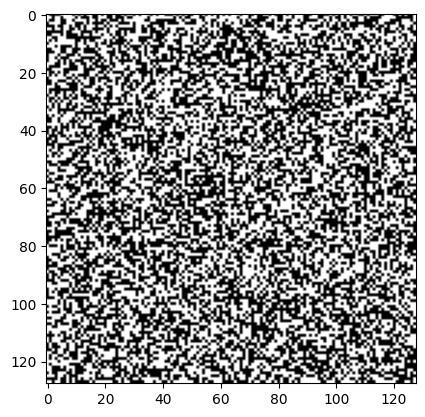

In [ ]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [ ]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (im_bin[i1][j1]+im_bin[i1][j2]+im_bin[i2][j1]+im_bin[i2][j2])*beta_reg 
            p0 = math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= (4 - (im_bin[i1][j1]+im_bin[i1][j2]+im_bin[i2][j1]+im_bin[i2][j2]))*beta_reg
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j] = 0
                else :
                    im_bin[i,j] = 1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

In [1]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg = - 50

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(15):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

NameError: name 'plt' is not defined

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3

Avec le même paramètre $\beta$, on observe des images différentes à chaque exécution.

Ceci est dû à deux raisons :

- im_bin est générée aléatoirement à chaque exécution
- Le paramètre pour le critère de décision est le résultat d'un tirage d'une variable aléatoire (loi uniforme sur [0,1])

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

#A4

Plus le paramètre $\beta$ est grand, moins on a de pixels isolés. On se retrouve avec des régions connexes beaucoup plus grandes.

#Q5
Which image minimizes the overall energy for this model?


#A5

Théoriquement, pour notre cas, une image soit toute blanche, soit toute noire, minimiserait l'énergie pour ce modèle.


#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

#A6


Avec des valeurs de beta negatives, on a le résultat inverse, cela favorise l'apparition de zones différentes.

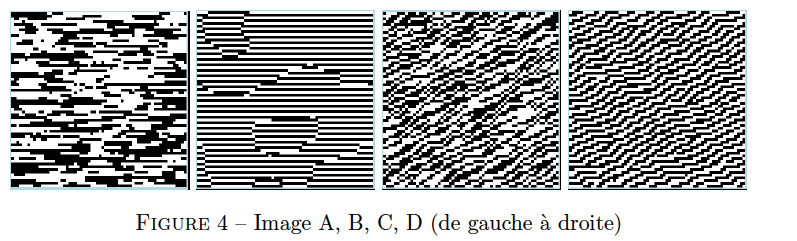

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





#A7

Image A : Avec un potentiel de -1, on provoque une alternance périodique des pixels noirs/blancs dans sa direction (-1 <0), l'image étant la plus périodique est celle dans la direction verticale. Clique verticale.

Image B : Avec un potentiel de 1, on provoque l'apparition de régions homogénes dans sa direction (1>0), l'homogénisation est horizontale. Clique horizontale.

Image C : Avec un potentiel de -1, on provoque une alternance périodique des pixels noirs/blancs dans sa direction (-1 <0), direction contraire des rayures diagonales.

Image D : Rayures diagonales.

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

#A8

Pour faire cela, on va utiliser le modèle Ising suivant

$U_c(0,1)=U_c(1,0)=0$ and $U_c(1,1)=U_c(0,0) =- \beta$ acar on a vu à la question 6 qu'un beta négatif favorise l'apparition des zones voulues.

On va alors utiliser des voisns différents pour cette tâche: on va prendre ceux dans les directions  $\pi/4$ or $3\pi/4$


In [6]:
def echan_diago(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg1 = -(im_bin[i1][j1]+im_bin[i1][j2]+im_bin[i2][j1]+im_bin[i2][j2])*beta_reg 
            p1 = math.exp(-Ureg1);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg0= -(4 - (im_bin[i1][j1]+im_bin[i1][j2]+im_bin[i2][j1]+im_bin[i2][j2]))*beta_reg
            p0=math.exp(-Ureg0);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j] = 0
                else :
                    im_bin[i,j] = 1

    return im_bin

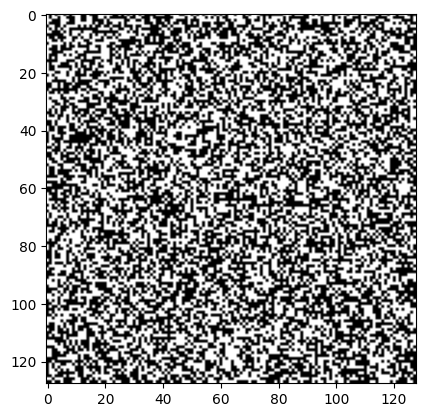

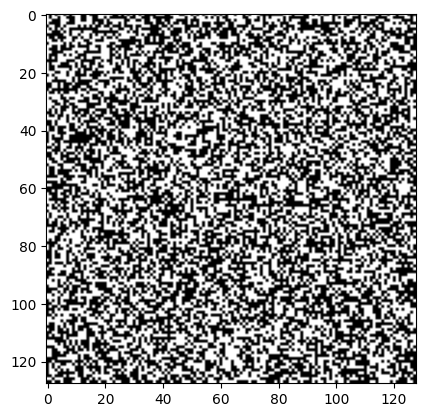

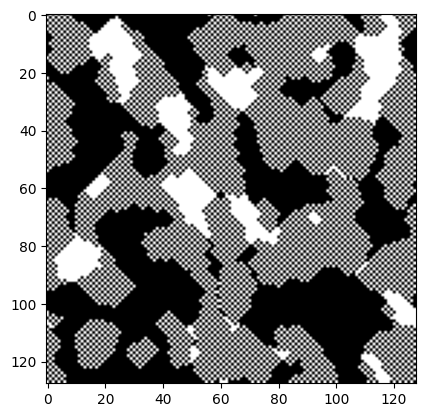

In [9]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg = 20

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(15):
    echan_diago(im_bin,beta_reg)
    #plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

On remarque ici les zones diagonales qui ont été favorisées, cela se voit à différents endroits ou un grillage diagonal apparait. 